In [1]:
#Dependencies 
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Loading CSV File 
file_path = Path("../../Test-Data/final_genre_12k.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,track_id,track,artist,genre,primary_genre,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,3e9HZxeyfWwjeyPAMmWSSQ,thank-u-next,Ariana-Grande,"['R&B', 'Pop', 'Electro', 'Electro-Pop', 'Danc...",R&B,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,1,5p7ujcrUXASCNwRaWNHR1C,Without-Me,Halsey,"['R&B', 'Pop', 'Contemporary R&B', 'Electronic...",R&B,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,2,2xLMifQCjDGFmkHkpNLD9h,SICKO-MODE,Travis-Scott,"['Rap', 'Memes', 'Progressive Pop', 'Texas Rap...",Rap,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,3,0bYg9bo50gSsH3LtXe2SQn,All-I-Want-for-Christmas-Is-You,Mariah-Carey,"['R&B', 'Pop', 'Piano', 'New Wave', 'Christian...",R&B,241107,7,1,4,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277
4,4,0MMSmg7zyo6pOKZrfHUOqu,A-Holly-Jolly-Christmas,Burl-Ives,"['Pop', 'Holiday', 'Cover', 'Christmas']",Pop,133547,0,1,4,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456


In [3]:
df=df.drop(columns=["Unnamed: 0","track_id","track","artist","genre"])
df.head()

,primary_genre,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,R&B,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,R&B,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,Rap,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,R&B,241107,7,1,4,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277
4,Pop,133547,0,1,4,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456


In [4]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["acousticness","energy","liveness","loudness","speechiness","valence","tempo","instrumentalness","duration_ms","time_signature","key","mode","danceability"]])


In [5]:
X = df.drop("primary_genre", axis=1)
y = df["primary_genre"].values

In [6]:
X.head()


,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,241107,7,1,4,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277
4,133547,0,1,4,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456


In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


k: 1, Train/Test Score: 1.000/0.392
k: 3, Train/Test Score: 0.670/0.408
k: 5, Train/Test Score: 0.614/0.436
k: 7, Train/Test Score: 0.596/0.455
k: 9, Train/Test Score: 0.571/0.451
k: 11, Train/Test Score: 0.559/0.458
k: 13, Train/Test Score: 0.550/0.457
k: 15, Train/Test Score: 0.538/0.459
k: 17, Train/Test Score: 0.537/0.460
k: 19, Train/Test Score: 0.538/0.460


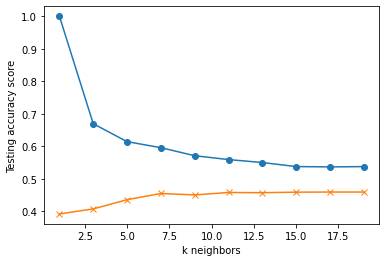

In [11]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [12]:
# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.436


In [13]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
confusion_matrix(y_true, y_pred)

array([[113,   0, 145,   9,   0,  56],
       [  0,   0,   4,   0,   0,   1],
       [146,   0, 775, 100,  25, 193],
       [ 32,   0, 306,  82,  18,  40],
       [  4,   0,  56,  31, 118,   4],
       [ 90,   0, 352,  34,   6, 189]], dtype=int64)

In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.35      0.32       323
           1       0.00      0.00      0.00         5
           2       0.47      0.63      0.54      1239
           3       0.32      0.17      0.22       478
           4       0.71      0.55      0.62       213
           5       0.39      0.28      0.33       671

    accuracy                           0.44      2929
   macro avg       0.36      0.33      0.34      2929
weighted avg       0.43      0.44      0.42      2929



c:\Users\jeuge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeuge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeuge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
new_song = [[0.22900, 0.653, 0.1010, -5.634, 0.0658, 0.412, 106.966, 0.000000, 207320, 4, 1,	1,	0.717]]
#Correct Answer is R&B
prediction = knn.predict(new_song)

In [19]:
from sklearn.metrics import accuracy_score


In [20]:
predicted_genre = label_encoder.inverse_transform(prediction)
prediction = knn.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(predicted_genre)
print(accuracy)

['Pop']
0.42301126664390576


c:\Users\jeuge\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
